In [1]:
import numpy as np

import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
print('Shape of train_images :-', train_images.shape)
print('Shape of train labels :-', train_labels.shape)
print('Shape of test images :-', test_images.shape)
print('Shape of test labels :-', test_labels.shape)

Shape of train_images :- (60000, 28, 28)
Shape of train labels :- (60000,)
Shape of test images :- (10000, 28, 28)
Shape of test labels :- (10000,)


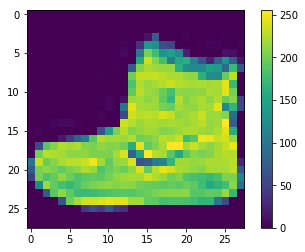

In [4]:
fig = plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()
plt.close(fig)

In [5]:
train_images = train_images / 255.
test_images = test_images / 255.

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

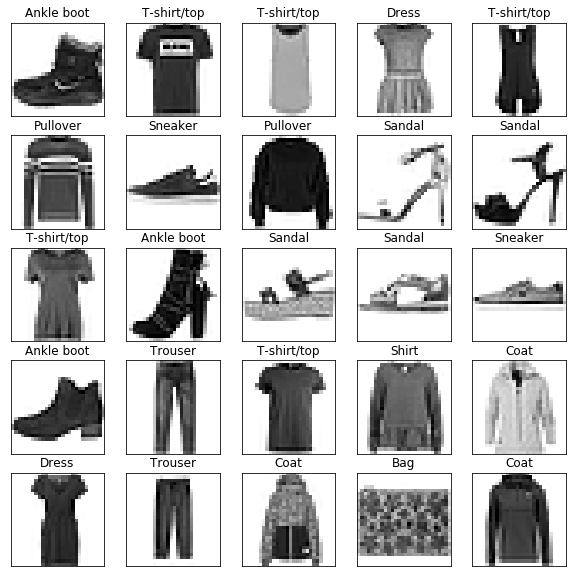

In [7]:
fig = plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.title( class_names[train_labels[i]] )
plt.show()
plt.close(fig)

In [8]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
history = model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 6s 104us/sample - loss: 0.5057 - acc: 0.8220
Epoch 2/5
60000/60000 [==============================] - 6s 101us/sample - loss: 0.3801 - acc: 0.8620
Epoch 3/5
60000/60000 [==============================] - 6s 107us/sample - loss: 0.3402 - acc: 0.8765
Epoch 4/5
60000/60000 [==============================] - 6s 102us/sample - loss: 0.3180 - acc: 0.8831
Epoch 5/5
60000/60000 [==============================] - 6s 102us/sample - loss: 0.2983 - acc: 0.8899


In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 39us/sample - loss: 0.3466 - acc: 0.8768


In [25]:
def plot_image(i, predictions_array, true_labels, images):
    prediction_array, true_label, image = predictions_array[i], true_labels[i], images[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(image, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(prediction_array)
    color = 'blue' if predicted_label == true_label else 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(prediction_array),
                                class_names[true_label]),
                                color=color)

In [26]:
predictions_array = model.predict(test_images)

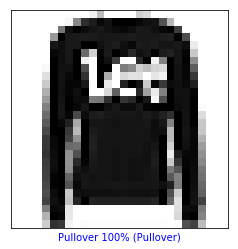

In [27]:
plot_image(1, predictions_array, test_labels, test_images)

In [28]:
def plot_value_array(i, predictions_array, true_labels):
    prediction_array, true_label = predictions_array[i], true_labels[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    thisplot = plt.bar(range(10), prediction_array, color='#777777')
    plt.ylim([0, 1])
    predicted_label = np.argmax(prediction_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

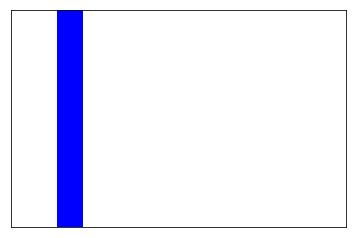

In [29]:
plot_value_array(2, predictions_array, test_labels)

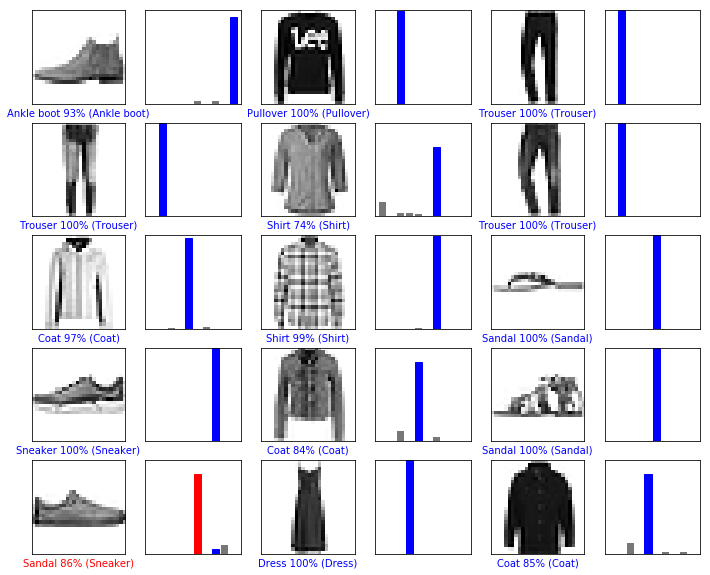

In [30]:
num_rows = 5
num_cols = 3

num_images = num_rows * num_cols

plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions_array, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions_array, test_labels)
plt.show()

In [31]:
test_img = test_images[10]

In [32]:
test_img = np.expand_dims(test_img, 0)
test_img.shape

(1, 28, 28)

In [34]:
pred = model.predict(test_img)[0]

In [35]:
np.argmax(pred)

4

In [36]:
test_labels[10]

4

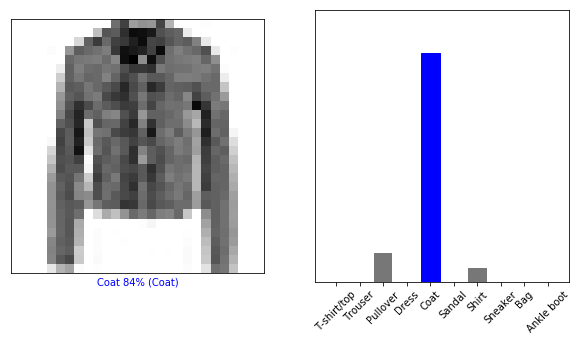

In [46]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plot_image(10, predictions_array, test_labels, test_images)
plt.subplot(122)
plot_value_array(10, predictions_array, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)